<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Качество-моделей-на-несбалансированных-данных" data-toc-modified-id="Качество-моделей-на-несбалансированных-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Качество моделей на несбалансированных данных</a></span><ul class="toc-item"><li><span><a href="#RandomForest" data-toc-modified-id="RandomForest-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>RandomForest</a></span></li><li><span><a href="#LogisticRegression" data-toc-modified-id="LogisticRegression-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>LogisticRegression</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Upsampling" data-toc-modified-id="Upsampling-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Upsampling</a></span></li><li><span><a href="#Downsampling" data-toc-modified-id="Downsampling-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Downsampling</a></span></li><li><span><a href="#Библиотека-Imblearn" data-toc-modified-id="Библиотека-Imblearn-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Библиотека Imblearn</a></span><ul class="toc-item"><li><span><a href="#SMOTE" data-toc-modified-id="SMOTE-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>SMOTE</a></span></li><li><span><a href="#ENN" data-toc-modified-id="ENN-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>ENN</a></span></li><li><span><a href="#SMOTEENN" data-toc-modified-id="SMOTEENN-3.3.3"><span class="toc-item-num">3.3.3&nbsp;&nbsp;</span>SMOTEENN</a></span></li><li><span><a href="#SMOTETomek" data-toc-modified-id="SMOTETomek-3.3.4"><span class="toc-item-num">3.3.4&nbsp;&nbsp;</span>SMOTETomek</a></span></li></ul></li><li><span><a href="#Результаты-балансировки" data-toc-modified-id="Результаты-балансировки-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Результаты балансировки</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Финальные-комментарии-ревьюера" data-toc-modified-id="Финальные-комментарии-ревьюера-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Финальные комментарии ревьюера</a></span></li></ul></div>

# Отток клиентов

В нашем распоряжении исторические данные о поведении клиентов и расторжении договоров с «Бета-Банком». Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет.

Необходимо протестировать различные модели и выбрать лучшую по метрике качества F1.

Описание данных:
* `RowNumber` — индекс строки в данных
* `CustomerId` — уникальный идентификатор клиента
* `Surname` — фамилия
* `CreditScore` — кредитный рейтинг
* `Geography` — страна проживания
* `Gender` — пол
* `Age` — возраст
* `Tenure` — сколько лет человек является клиентом банка
* `Balance` — баланс на счёте
* `NumOfProducts` — количество продуктов банка, используемых клиентом
* `HasCrCard` — наличие кредитной карты
* `IsActiveMember` — активность клиента
* `EstimatedSalary` — предполагаемая зарплата

## Подготовка данных

Импорт необходимых библиотек: `imblearn`, `pandas`, `sklearn`.

In [1]:
!pip install -U imbalanced-learn --user  

In [2]:
#conda install -c conda-forge imbalanced-learn                     #установка библиотеки imblearn (conda)
#pip install -U imbalanced-learn                                   #установка библиотеки imblearn (pip)
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.pipeline import Pipeline as imbpipeline

import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.compose import ColumnTransformer

Загружаем датасет, сохраняем в переменной `data`.

In [3]:
try:
    data = pd.read_csv('/datasets/Churn.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/Churn.csv')

Выводим первые 10 строк датафрейма.

In [4]:
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


Датасет записан корректно. Обратим внимание, что:
- Названия столбцов для удобства лучше привести к строчному регистру.
- При ближайшем рассмотрении выясняется, что столбцы **RowNumber**, **CustomerId**, **Surname** содержат уникальные идентификаторы и фамилии клиентов - т.е. информацию, которая не имеет ценности.
- Столбец **exited** - наш target, целевой признак.

Предстоит решить задачу бинарной классификации.

Посмотрим на общую информацию о датафрейме.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Датафрейм содержит 10000 объектов, столбец **Tenure** содержит примерно 9% пропусков, а тип данных необходимо привести к `int`.

Для начала проверим датафрейм на наличие полные дубликатов строк.

In [6]:
data.duplicated().sum()

0

Дубликатов нет.

Переведем названия столбцов в строчный регистр и перепроверим результат.

In [7]:
data.columns = data.columns.str.lower()
data.columns

Index(['rownumber', 'customerid', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard',
       'isactivemember', 'estimatedsalary', 'exited'],
      dtype='object')

Заполним пропуски в столбце **Tenure** медианным значением, рассчитанным для каждой подгруппы **Exited** → **Gender** → **Geography**.

In [8]:
data['tenure'] = data['tenure'].fillna(data.groupby(['exited','gender','geography'])['tenure'].transform('median'))
data.tenure.isna().sum()

0

Пропусков в столбце нет.

Приведем тип данных в столбце **Tenure** к `int` и избавимся от лишних столбцов.

In [9]:
data['tenure'] = data.tenure.astype('int')
data = data.drop(['rownumber','customerid','surname'], axis=1)

Посмотрим, как выглядят основные параметры описательной статистики.

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
creditscore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
tenure,10000.0,4.991900,2.761086,0.00,3.00,5.000,7.0000,10.00
balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
numofproducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
hascrcard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
isactivemember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
estimatedsalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


Данные не вызывают подозрений. Видим, что кредитный рейтинг всех клиентов находится в диапазоне от 350 до 850 баллов, возраст от 18 до 92 лет, 70% имеют кредитную карту исследуемого банка, а 51% имеют статус активного клиента.

Построим общую гистограмму.

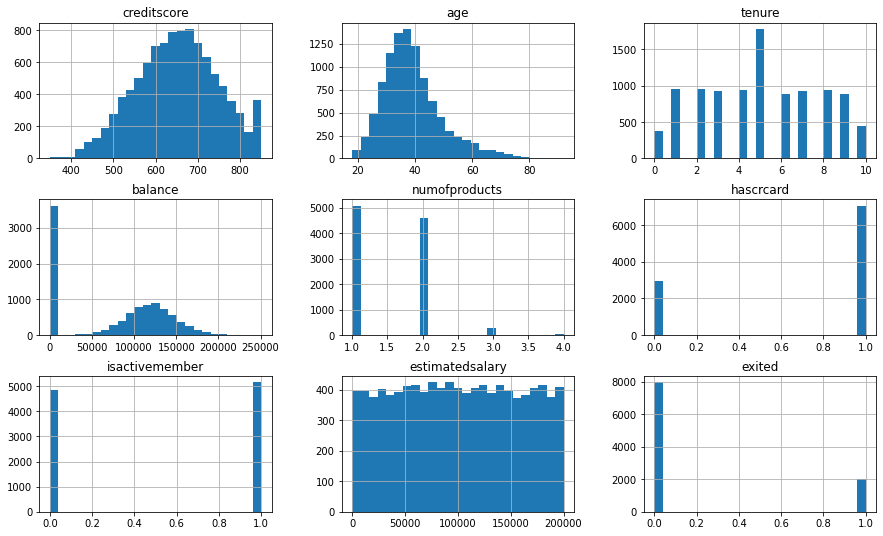

In [11]:
data.hist(bins=25, figsize=(15,9));

- Большинство клиентов имеют кредитный рейтинг на йровне 650-680 баллов, виден выброс в области 850 баллов.
- Средний возраст клиента - 38 лет.
- Почти треть клиентов не хранят средства в банке.
- Предполагаемая зарплата распределена удивительно ровно. Вероятно, мы имеем дело со стратифицированной выборкой.

Отдельно посмотрим на баланс классов целевого признака.

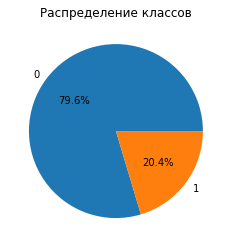

In [12]:
data.exited.value_counts(normalize=True).plot(
    kind='pie',
    title='Распределение классов',
    ylabel='',
    autopct='%1.1f%%');

Целевой признак не сбаллансирован. Доля ушедших клиентов в выборке 20,37%.

Закодируем категориальные признакы с помощью One Hot Encoding.

In [13]:
data_ohe = pd.get_dummies(data, drop_first=True)
data_ohe

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,geography_Germany,geography_Spain,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


Категориальные признаки закодированы. Время разбить датасет на тренировочную и тестовую выборки.

In [14]:
train, test = train_test_split(data_ohe, 
                               test_size=0.2, 
                               stratify=data.exited, 
                               random_state=100)

train.exited.mean(), test.exited.mean()

(0.20375, 0.2035)

Выборка разбита с сохранением распределения классов целевого признака.

Отделим столбец с целевым признаком.

In [15]:
X_train = train.drop(['exited'], axis=1)
y_train = train['exited']

X_test = test.drop(['exited'], axis=1)
y_test = test['exited']

display(X_train, y_train)

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,geography_Germany,geography_Spain,gender_Male
1814,579,31,2,90547.48,2,1,1,18800.13,1,0,1
4060,640,29,4,0.00,2,1,0,44904.26,0,0,0
797,488,32,3,114540.38,1,1,0,92568.07,1,0,1
5158,587,55,9,0.00,1,1,0,64593.07,0,0,1
7950,516,33,10,138847.90,1,1,1,127256.70,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1507,549,43,3,134985.66,1,1,0,6101.41,1,0,0
7026,677,27,5,0.00,2,0,1,114685.92,0,0,0
7601,828,31,9,0.00,1,0,1,164257.37,0,0,1
4595,743,65,2,131935.51,1,1,1,96399.67,1,0,1


1814    0
4060    0
797     0
5158    0
7950    0
       ..
1507    0
7026    0
7601    0
4595    1
5518    0
Name: exited, Length: 8000, dtype: int64

Данные подготовлены к обучению:
- Устранены пропуски и некорректный тип данных в столбце Tenure.
- Удалены столбцы RowNumber, CustomerId, Surname.
- Исследован баланс классов.
- Категориальные признаки Gender, Geography закодированы с помощью One Hot Encoding.
- Датасет разделен на тренировочную и тестовые выборки.

## Качество моделей на несбалансированных данных

Для решения задачи бинарной классификации будем сраванивать две модели: RandomForestClassifier и LogisticRegression.

### RandomForest

Для выбора лучших гиперпараметров модели будем использовать RandomizedSearchCV - модуль, который создает модель для заданного количества случайных комбинаций гиперпараметров. Также этот модуль автоматически проведет кросс-валидацию модели с помощью (Stratified)KFold. Для оценки качества будет применяться метрика F1.

*В целях ускорения вычислений, кол-во итераций для всех подобных инструментов будет минимальным. Лучшие результаты будут записаны отдельно.*

F1 on VALID: 0.60
AUC-ROC on VALID: 0.86
n_estimators      75
max_features       8
max_depth         11
criterion       gini
dtype: object

F1 on TEST: 0.56
AUC-ROC on TEST: 0.85


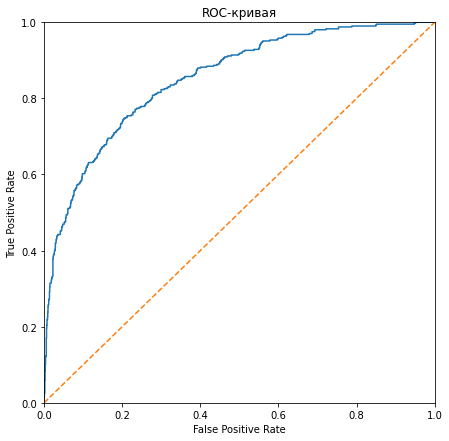

In [16]:
clf = RandomForestClassifier(random_state=100)
params_rf = {
    'n_estimators':range(50, 150, 5),
    'criterion':['gini','entropy'],
    'max_depth':[8,9,10,11,12,13,14],
    'max_features':[5,6,7,8,9,10]
}

metrics = ['f1', 'roc_auc']

search = RandomizedSearchCV(clf, params_rf, n_iter=10, cv=4, scoring=metrics, refit='f1')
search.fit(X_train, y_train)
results = search.cv_results_

# Вывод метрик, полученных при кросс-валидации
print('F1 on VALID:', '%.2f' %search.best_score_)
print('AUC-ROC on VALID:', '%.2f' %results['mean_test_roc_auc'].mean())
print(pd.Series(search.best_params_))
print()

# Расчет метрик на тестовой выборке
predictions_rf = search.predict(X_test)
f1_rf = f1_score(y_test, predictions_rf)
probabilities_rf = search.predict_proba(X_test)
roc_auc_rf = roc_auc_score(y_test, probabilities_rf[:, 1])
print('F1 on TEST:', '%.2f' %f1_rf)
print('AUC-ROC on TEST:', '%.2f' %roc_auc_rf)

# ROC-кривая
fpr, tpr, thresholds = roc_curve(y_test, probabilities_rf[:, 1])
plt.figure(figsize=(7,7))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

Параметры лучшей модели:

F1 on VALID: 0.60
AUC-ROC on VALID: 0.86
- n_estimators      85
- max_features       8
- max_depth         11
- criterion       gini

F1 on TEST: 0.56
AUC-ROC on TEST: 0.85

### LogisticRegression

Извесно, что стандартизация данных может значительно улучшить метрики качества модели логистической регрессии. Для того, чтобы совместить возможность использования модуля GridSearchCV со стандартизацией данных, попробуем использовать `Pipeline` из библиотеки `sklearn`. Этот шаг позволит избежать утечки данных в валидационную выборку на стадии кросс-валидации.

Также для моделей логистической регрессии будем просчитывать две метрики: f1 и auc-roc. Метрику auc-roc будем извлекать из `cv_results_`.

F1 on VALID: 0.50
AUC-ROC on VALID: 0.77
lr__class_weight     balanced
lr__max_iter              100
lr__solver          liblinear
dtype: object

F1 on TEST: 0.49
AUC-ROC on TEST: 0.77


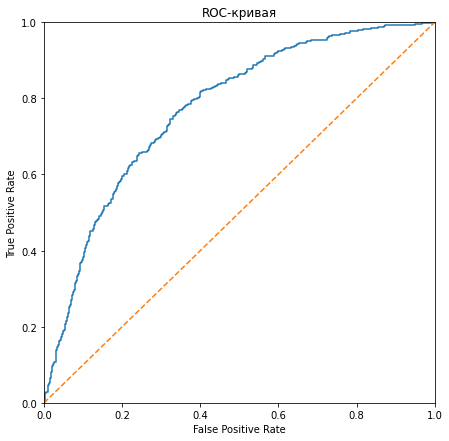

In [17]:
preprocessor = ColumnTransformer(
    transformers=[('scaler', StandardScaler(), ['creditscore','age','tenure','balance','numofproducts','estimatedsalary'])],
    remainder='passthrough'
)

pipeline_lr = Pipeline([
    ('preprocessor', preprocessor), 
    ('lr', LogisticRegression(random_state=100))
])

params_lr = {
    'lr__class_weight':[None,'balanced'],
    'lr__solver':['lbfgs','liblinear'],
    'lr__max_iter':[100, 500, 1000, 2000],
}

metrics = ['f1', 'roc_auc']

grid = GridSearchCV(pipeline_lr, params_lr, cv=4, scoring=metrics, refit='f1')
grid.fit(X_train, y_train)
results = grid.cv_results_

# Вывод метрик, полученных при кросс-валидации
print('F1 on VALID:', '%.2f' %grid.best_score_)
print('AUC-ROC on VALID:', '%.2f' %results['mean_test_roc_auc'].mean())
print(pd.Series(grid.best_params_))
print()

# Расчет метрик на тестовой выборке
predictions_lr = grid.predict(X_test)
f1_lr = f1_score(y_test, predictions_lr)
probabilities_lr = grid.predict_proba(X_test)
roc_auc_lr = roc_auc_score(y_test, probabilities_lr[:, 1])
print('F1 on TEST:', '%.2f' %f1_lr)
print('AUC-ROC on TEST:', '%.2f' %roc_auc_lr)

# ROC-кривая
fpr, tpr, thresholds = roc_curve(y_test, probabilities_lr[:, 1])
plt.figure(figsize=(7,7))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

Видим, что при встроенной балансировке классов модель показала результат F1:0.49, AUC-ROC:0.77, что заметно хуже, чем модель случайного леса. Для того, чтобы узнать метрику F1 для модели, построенной на несбалансированных данных, обратимся к `cv_results_`

In [18]:
pd.concat([pd.Series(results['param_lr__class_weight']), pd.Series(results['mean_test_f1'])], axis=1).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,None,None,None,None,None,None,None,None,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced
1,0.324315,0.325666,0.324315,0.325666,0.324315,0.325666,0.324315,0.325666,0.497209,0.49743,0.497209,0.49743,0.497209,0.49743,0.497209,0.49743


Без балансировки модель показывает результат F1:0,32. Также можно заметить, что метрика AUC-ROC при этом практически не меняется.

## Борьба с дисбалансом

Проверим, улучшатся ли метрики качества, если для построения моделей использовать более сбалансированные варианты датасета. Для начала протестируем самый простой способ: увеличим кол-во объектов недопредставленного класса (ушедшие клиенты, exited = 1) с помощью функции upsample.

### Upsampling

Создадим функцию, которая устранит дисбаланс, увеличив количество объектов недопредставленного класса.

In [19]:
def upsample(features, target, repeat):
    
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled = shuffle(features_upsampled, random_state=100)
    target_upsampled = shuffle(target_upsampled, random_state=100)
    
    return features_upsampled, target_upsampled

X_train_upsampled, y_train_upsampled = upsample(X_train, y_train, 4)
X_train_upsampled.shape, y_train_upsampled.shape, y_train_upsampled.mean()

((12890, 11), (12890,), 0.5058184639255237)

Целевой признак сбалансирован, количество единиц сосатвляет 50.58%.

Построим модель случайного леса, однако в этот раз обучим ее на сбалансированном датасете.

F1 on VALID: 0.932863453105718
AUC-ROC on VALID: 0.9460053110933124
n_estimators         50
max_features          6
max_depth            14
criterion       entropy
dtype: object

F1 on TEST: 0.5836385836385837
AUC-ROC on TEST: 0.8397002549544923


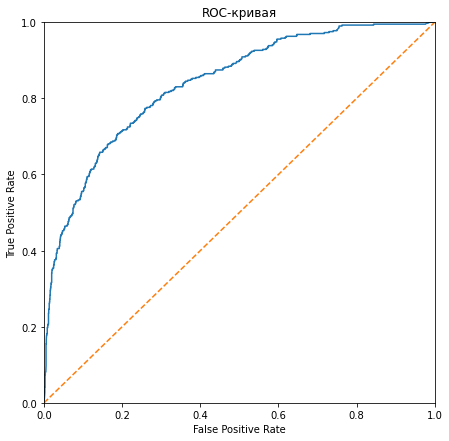

In [20]:
clf = RandomForestClassifier(random_state=100)
params_rf = {
    'n_estimators':range(50, 150, 5),
    'criterion':['gini','entropy'],
    'max_depth':[8,9,10,11,12,13,14],
    'max_features':[5,6,7,8,9,10]
}

metrics = ['f1', 'roc_auc']

search = RandomizedSearchCV(clf, params_rf, n_iter=10, cv=4, scoring=metrics, refit='f1')
search.fit(X_train_upsampled, y_train_upsampled)
results = search.cv_results_

# Вывод метрик, полученных при кросс-валидации
print('F1 on VALID:', search.best_score_)
print('AUC-ROC on VALID:', results['mean_test_roc_auc'].mean())
print(pd.Series(search.best_params_))
print()

# Расчет метрик на тестовой выборке
predictions_rf = search.predict(X_test)
f1_rf = f1_score(y_test, predictions_rf)
probabilities_rf = search.predict_proba(X_test)
roc_auc_rf = roc_auc_score(y_test, probabilities_rf[:, 1])
print('F1 on TEST:', f1_rf)
print('AUC-ROC on TEST:', roc_auc_rf)

# ROC-кривая
fpr, tpr, thresholds = roc_curve(y_test, probabilities_rf[:, 1])
plt.figure(figsize=(7,7))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

Параметры лучшей модели:

F1 on VALID: 0.931350553362873
AUC-ROC on VALID: 0.9441223869883533
- n_estimators     120
- max_features      10
- max_depth         14
- criterion       gini

F1 on TEST: 0.5824039653035935
AUC-ROC on TEST: 0.8322891458484679

Видим, что модель явно переобучилась и показывает слишком хорошие метрики на валидационной выборке. На тестовой выборке модель улучшила F1 примерно на 2,5%.

Теперь построим модель логистической регрессии.

F1 on VALID: 0.7068701478867796
AUC-ROC on VALID: 0.7694434367991932
lr__max_iter           50
lr__solver      liblinear
dtype: object

F1 on TEST: 0.4916003536693192
AUC-ROC on TEST: 0.7727265015400608


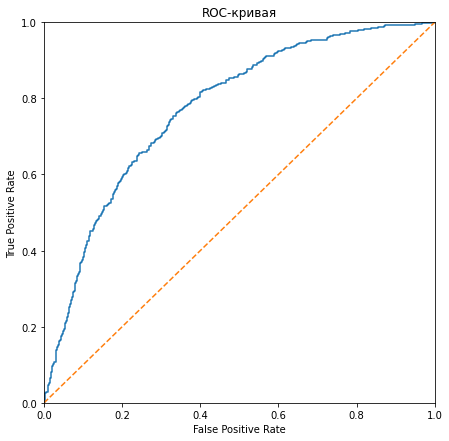

In [21]:
preprocessor = ColumnTransformer(
    transformers=[('scaler', StandardScaler(), ['creditscore','age','tenure','balance','numofproducts','estimatedsalary'])],
    remainder='passthrough'
)

pipeline_lr = Pipeline([
    ('preprocessor', preprocessor), 
    ('lr', LogisticRegression(random_state=100))
])

params_lr = {
    'lr__solver':['lbfgs','liblinear'],
    'lr__max_iter':[50, 100, 500, 1000, 2000],
}

metrics = ['f1', 'roc_auc']

grid = GridSearchCV(pipeline_lr, params_lr, cv=4, scoring=metrics, refit='f1')
grid.fit(X_train_upsampled, y_train_upsampled)
results = grid.cv_results_

# Вывод метрик, полученных при кросс-валидации
print('F1 on VALID:', grid.best_score_)
print('AUC-ROC on VALID:', results['mean_test_roc_auc'].mean())
print(pd.Series(grid.best_params_))
print()

# Расчет метрик на тестовой выборке
predictions_lr = grid.predict(X_test)
f1_lr = f1_score(y_test, predictions_lr)
probabilities_lr = grid.predict_proba(X_test)
roc_auc_lr = roc_auc_score(y_test, probabilities_lr[:, 1])
print('F1 on TEST:', f1_lr)
print('AUC-ROC on TEST:', roc_auc_lr)

# ROC-кривая
fpr, tpr, thresholds = roc_curve(y_test, probabilities_lr[:, 1])
plt.figure(figsize=(7,7))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

На тестовом наборе данных модель показывает худшие метрики качества, чем модель, обученная на несбалансированных данных с гиперпараметром `class_weight='balanced'`.

### Downsampling

Теперь проведем обратную операцию: случайным образом уменьшим долю объектов перепредставленного класса (оставшиеся клиенты, exited = 0).

In [22]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_sample = features_zeros.sample(frac=fraction, random_state=100)
    target_sample = target_zeros.sample(frac=fraction, random_state=100)
    
    features_downsampled = pd.concat([features_sample] + [features_ones])
    target_downsampled = pd.concat([target_sample] + [target_ones])
    
    features_downsampled = shuffle(features_downsampled, random_state=100)
    target_downsampled = shuffle(target_downsampled, random_state=100)
    
    return features_downsampled, target_downsampled

X_train_downsampled, y_train_downsampled = downsample(X_train, y_train, 0.25)
X_train_downsampled.shape, y_train_downsampled.shape, y_train_downsampled.mean()

((3222, 11), (3222,), 0.5058969584109249)

Целевой признак сбалансирован, построим модель случайного леса.

F1 on VALID: 0.7761172313563092
AUC-ROC on VALID: 0.8509629905834274
n_estimators         55
max_features          6
max_depth            11
criterion       entropy
dtype: object

F1 on TEST: 0.579624134520277
AUC-ROC on TEST: 0.8525598017123441


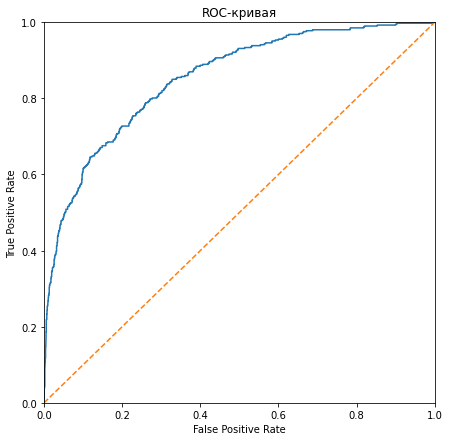

In [23]:
clf = RandomForestClassifier(random_state=100)
params_rf = {
    'n_estimators':range(50, 150, 5),
    'criterion':['gini','entropy'],
    'max_depth':[8,9,10,11,12,13,14],
    'max_features':[5,6,7,8,9,10]
}

metrics = ['f1', 'roc_auc']

search = RandomizedSearchCV(clf, params_rf, n_iter=10, cv=4, scoring=metrics, refit='f1')
search.fit(X_train_downsampled, y_train_downsampled)
results = search.cv_results_

# Вывод метрик, полученных при кросс-валидации
print('F1 on VALID:', search.best_score_)
print('AUC-ROC on VALID:', results['mean_test_roc_auc'].mean())
print(pd.Series(search.best_params_))
print()

# Расчет метрик на тестовой выборке
predictions_rf = search.predict(X_test)
f1_rf = f1_score(y_test, predictions_rf)
probabilities_rf = search.predict_proba(X_test)
roc_auc_rf = roc_auc_score(y_test, probabilities_rf[:, 1])
print('F1 on TEST:', f1_rf)
print('AUC-ROC on TEST:', roc_auc_rf)

# ROC-кривая
fpr, tpr, thresholds = roc_curve(y_test, probabilities_rf[:, 1])
plt.figure(figsize=(7,7))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

Параметры лучшей модели:

F1 on VALID: 0.7748063877060953
AUC-ROC on VALID: 0.8499278061475538
- n_estimators         70
- max_features         10
- max_depth             8
- criterion       entropy

F1 on TEST: 0.5889328063241106
AUC-ROC on TEST: 0.8548216938047446

Видим, что данная модель RandomForest, не так сильно переобучилась на валидационной выборке и показывает (на данный момент) лучший результат на тестовой выборке - F1 = 0.5889.

Построим модель логистической регрессии.

F1 on VALID: 0.6973564819433611
AUC-ROC on VALID: 0.7621413886863376
lr__max_iter       50
lr__solver      lbfgs
dtype: object

F1 on TEST: 0.4876325088339222
AUC-ROC on TEST: 0.76995176995177


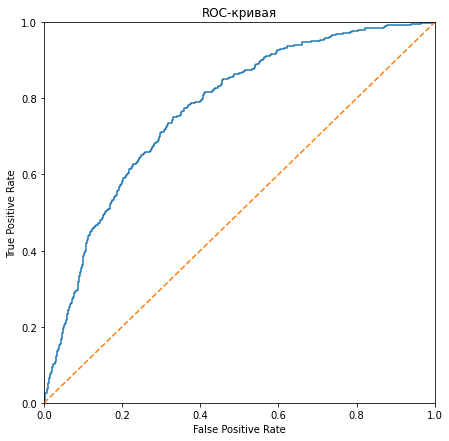

In [24]:
preprocessor = ColumnTransformer(
    transformers=[('scaler', StandardScaler(), ['creditscore','age','tenure','balance','numofproducts','estimatedsalary'])],
    remainder='passthrough'
)

pipeline_lr = Pipeline([
    ('preprocessor', preprocessor), 
    ('lr', LogisticRegression(random_state=100))
])

params_lr = {
    'lr__solver':['lbfgs','liblinear'],
    'lr__max_iter':[50, 100, 500, 1000, 2000],
}

metrics = ['f1', 'roc_auc']

grid = GridSearchCV(pipeline_lr, params_lr, cv=4, scoring=metrics, refit='f1')
grid.fit(X_train_downsampled, y_train_downsampled)
results = grid.cv_results_

# Вывод метрик, полученных при кросс-валидации
print('F1 on VALID:', grid.best_score_)
print('AUC-ROC on VALID:', results['mean_test_roc_auc'].mean())
print(pd.Series(grid.best_params_))
print()

# Расчет метрик на тестовой выборке
predictions_lr = grid.predict(X_test)
f1_lr = f1_score(y_test, predictions_lr)
probabilities_lr = grid.predict_proba(X_test)
roc_auc_lr = roc_auc_score(y_test, probabilities_lr[:, 1])
print('F1 on TEST:', f1_lr)
print('AUC-ROC on TEST:', roc_auc_lr)

# ROC-кривая
fpr, tpr, thresholds = roc_curve(y_test, probabilities_lr[:, 1])
plt.figure(figsize=(7,7))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

Существенных изменений нет, модель все еще незначительно уступает модели, обученной на несбалансированных данных с гиперпараметром `class_weight='balanced'`

### Библиотека Imblearn

Попробуем использовать некоторые методы из библиотеки `imblearn`, кототорая предназначена для балансировки классов. 

Создадим функцию, которая будет работать с `Pipeline` из библиотеки `imblearn`, который позволяет использовать методы up- и down- сэмплинга совместно с кросс-валидацией. Также в pipeline включена стандартизация данных как для модели случайного леса, так и для логистической регрессии, поскольку многие методы `imblearn` работают лучше со стандартизированными данными.

Функция **RFC** принимает на вход количество итераций `RandomizedSearchCV`, а также метод сэмплинга `imblearn`. Возвращает среднюю метрику F1 для всех вариантов кросс-валидации, а также лучшие гиперпараметры модели при заданном в аргументе методе сэмлинга.

In [25]:
def RFC(n_of_iterations, imb_method):
    preprocessor = ColumnTransformer(
        transformers=[('scaler', StandardScaler(), ['creditscore','age','tenure','balance','numofproducts','estimatedsalary'])],
        remainder='passthrough'
    )
    
    pipeline_rf = imbpipeline([
        ('preprocessor', preprocessor),
        ('imb', imb_method),
        ('rf', RandomForestClassifier(random_state=100))
    ])

    params_rf = {
        'rf__n_estimators':range(50, 150, 5),
        'rf__criterion':['gini','entropy'],
        'rf__max_depth':[8,9,10,11,12,13,14],
        'rf__max_features':[5,6,7,8,9,10]
    }

    search = RandomizedSearchCV(pipeline_rf, params_rf, n_iter=n_of_iterations, cv=4, scoring='f1')
    search.fit(X_train, y_train)
    results = grid.cv_results_
    return search.best_score_, results['mean_test_roc_auc'].mean(), search.best_params_

Функция **LR** принимает в качестве аргумента только метод imblearn. Возвращает F1, AUC-ROC и лучшие гиперпараметры модели.

In [26]:
def LR(imb_method):
    preprocessor = ColumnTransformer(
        transformers=[('scaler', StandardScaler(), ['creditscore','age','tenure','balance','numofproducts','estimatedsalary'])],
        remainder='passthrough'
    )
    
    pipeline_lr = imbpipeline([
        ('preprocessor', preprocessor),
        ('imb', imb_method),
        ('lr', LogisticRegression(random_state=100))
    ])

    params_lr = {
        'lr__class_weight':[None,'balanced'],
        'lr__solver':['lbfgs','liblinear'],
        'lr__max_iter':[100, 500, 1000, 2000],
    }

    metrics = ['f1', 'roc_auc']

    grid = GridSearchCV(pipeline_lr, params_lr, cv=4, scoring=metrics, refit='f1')
    grid.fit(X_train, y_train)
    results = grid.cv_results_
    return grid.best_score_, results['mean_test_roc_auc'].mean(), grid.best_params_

#### SMOTE

SMOTE - Synthetic Minority Over-sampling Technique

In [27]:
smote = SMOTE(random_state=100)
f1_smote_rfc, roc_auc_smote_rfc, best_params_smote_rfc = RFC(10, smote)
print('Mean F1:', f1_smote_rfc)
print('Mean AUC-ROC:', roc_auc_smote_rfc)
print(pd.Series(best_params_smote_rfc))

Mean F1: 0.6277034380273017
Mean AUC-ROC: 0.7621413886863376
rf__n_estimators         80
rf__max_features          5
rf__max_depth             8
rf__criterion       entropy
dtype: object


Параметры лучей модели:

Mean F1: 0.6302005107446742
Mean AUC-ROC: 0.7621413886863376
- rf__n_estimators         80
- rf__max_features          6
- rf__max_depth            10
- rf__criterion       entropy

In [28]:
smote = SMOTE(random_state=100)
f1_smote_lr, roc_auc_smote_lr, best_params_smote_lr = LR(smote)
print('Mean F1:', f1_smote_lr)
print('Mean AUC-ROC:', roc_auc_smote_lr)
print(pd.Series(best_params_smote_lr))

Mean F1: 0.4963965110481822
Mean AUC-ROC: 0.7677558821884072
lr__class_weight     None
lr__max_iter          100
lr__solver          lbfgs
dtype: object


Метрики качества модели практически не отличаются от метрик модели, обученной на несбалансированных данных с гиперпараметром `class_weight='balanced'`

#### ENN

Метод Edited Nearest Neighbours.

In [29]:
enn = EditedNearestNeighbours()
f1_enn_rfc, roc_auc_enn_rfc, best_params_enn_rfc = RFC(10, enn)
print('Mean F1:', f1_enn_rfc)
print('Mean AUC-ROC:', roc_auc_enn_rfc)
print(pd.Series(best_params_enn_rfc))

Mean F1: 0.622269231016912
Mean AUC-ROC: 0.7621413886863376
rf__n_estimators     145
rf__max_features       5
rf__max_depth          8
rf__criterion       gini
dtype: object


Параметры лучшей модели

Mean F1: 0.6194325730881605
Mean AUC-ROC: 0.7621413886863376
- rf__n_estimators        145
- rf__max_features          6
- rf__max_depth             9
- rf__criterion       entropy

In [30]:
enn = EditedNearestNeighbours()
f1_enn_lr, roc_auc_enn_lr, best_params_enn_lr = LR(enn)
print('Mean F1:', f1_enn_lr)
print('Mean AUC-ROC:', roc_auc_enn_lr)
print(pd.Series(best_params_enn_lr))

Mean F1: 0.4896182053549326
Mean AUC-ROC: 0.7654449075274588
lr__class_weight     balanced
lr__max_iter              100
lr__solver          liblinear
dtype: object


Качество модели кардинально не изменилось.

#### SMOTEENN

Метод, при котором комбинируются up- сэмплинг с помощью SMOTE и down- сэмплинг с помощью Edited Nearest Neighbours.

In [31]:
smoteenn = SMOTEENN(random_state=100)
f1_smoteenn_rfc, roc_auc_smoteenn_rfc, best_params_smoteenn_rfc = RFC(10, smoteenn)
print('Mean F1:', f1_smoteenn_rfc)
print('Mean AUC-ROC:', roc_auc_smoteenn_rfc)
print(pd.Series(best_params_smoteenn_rfc))

Mean F1: 0.5876215090943864
Mean AUC-ROC: 0.7621413886863376
rf__n_estimators         75
rf__max_features          6
rf__max_depth            14
rf__criterion       entropy
dtype: object


Параметры лучшей модели:

Mean F1: 0.5934708440021046
Mean AUC-ROC: 0.7621413886863376
- rf__n_estimators         85
- rf__max_features          5
- rf__max_depth            11
- rf__criterion       entropy

In [32]:
smoteenn = SMOTEENN(random_state=100)
f1_smoteenn_lr, roc_auc_smoteenn_lr, best_params_smoteenn_lr = LR(smoteenn)
print('Mean F1:', f1_smoteenn_lr)
print('Mean AUC-ROC:', roc_auc_smoteenn_lr)
print(pd.Series(best_params_smoteenn_lr))

Mean F1: 0.4929796954693838
Mean AUC-ROC: 0.7674709454244828
lr__class_weight    balanced
lr__max_iter             100
lr__solver             lbfgs
dtype: object


#### SMOTETomek

Метод, при котором комбинируются up- сэмплинг с помощью SMOTE и down- сэмплинг с помощью Tomek links.

In [33]:
smotetomek = SMOTETomek(random_state=100)
f1_smotetomek_rfc, roc_auc_smotetomek_rfc, best_params_smotetomek_rfc = RFC(10, smotetomek)
print('Mean F1:', f1_smotetomek_rfc)
print('Mean AUC-ROC:', roc_auc_smotetomek_rfc)
print(pd.Series(best_params_smotetomek_rfc))

Mean F1: 0.628794647123691
Mean AUC-ROC: 0.7621413886863376
rf__n_estimators         55
rf__max_features          5
rf__max_depth            11
rf__criterion       entropy
dtype: object


Параметры лучшей модели:

Mean F1: 0.6249203077060508
Mean AUC-ROC: 0.7621413886863376
- rf__n_estimators        105
- rf__max_features          7
- rf__max_depth             8
- rf__criterion       entropy

In [34]:
smotetomek = SMOTETomek(random_state=100)
f1_smotetomek_lr, roc_auc_smotetomek_lr, best_params_smotetomek_lr = LR(smotetomek)
print('Mean F1:', f1_smotetomek_lr)
print('Mean AUC-ROC:', roc_auc_smotetomek_lr)
print(pd.Series(best_params_smotetomek_lr))

Mean F1: 0.49608482030986223
Mean AUC-ROC: 0.7677450880295824
lr__class_weight         None
lr__max_iter              100
lr__solver          liblinear
dtype: object


### Результаты балансировки

Видим, что ни одна из моделей логистической регрессии не приближается по метрике качества F1 к моделям случайного леса. 

Среди моделей слуйчайного леса, обученных на сэмплированных с помощью различных методов данных, лучшую метрику (F1-63.02%) на кросс-валидации показала модель случайного леса с использованием **SMOTE** и гиперпараметрами:

- n_estimators         80
- max_features          6
- max_depth            10
- criterion       entropy

На втором месте модель с использованием **SMOTETomek** (F1-62.49%) и гиперпараметрами:

- n_estimators        105
- max_features          7
- max_depth             8
- criterion       entropy

## Тестирование модели

Обучим лучшую модель, полученную на предыдущем этапе, на всей тренировочной выборке целиком и проверим на тестовой.

Первый этап - стандартизация выборок.

In [35]:
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
col_names = ['creditscore','age','tenure','balance','numofproducts','estimatedsalary']
scaler = StandardScaler()
scaler = scaler.fit(X_train[col_names])
X_test_scaled[col_names] = scaler.transform(X_test[col_names])
X_train_scaled[col_names] = scaler.transform(X_train[col_names])

Создадим сэмплированный набора данных для обучения с помощью SMOTE и обучим модель.

In [36]:
smote = SMOTE(random_state=100)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)
X_train_smote.shape, len(y_train_smote), y_train_smote.mean()

((12740, 11), 12740, 0.5)

In [37]:
model_rf = RandomForestClassifier(random_state=100,
                                  n_estimators=80,
                                  max_features=6,
                                  max_depth=10,
                                  criterion='entropy')
model_rf.fit(X_train_smote, y_train_smote)
predictions_rf = model_rf.predict(X_test_scaled)
f1_rf = f1_score(y_test, predictions_rf)
probabilities_rf = model_rf.predict_proba(X_test_scaled)
roc_auc_rf = roc_auc_score(y_test, probabilities_rf[:, 1])
print('F1 on TEST:', f1_rf)
print('AUC-ROC on TEST:', roc_auc_rf)

F1 on TEST: 0.6034285714285714
AUC-ROC on TEST: 0.8536101586949044


Среднее гармоническое F1 финальной модели случайного леса составляет 0.6034.

## Вывод

На входе мы получили данные о поведении клиентов и расторжении договоров с «Бета-Банком». Данные были подготовлены к обучению:

- Устранены пропуски и некорректный тип данных в столбце Tenure.
- Удалены столбцы RowNumber, CustomerId, Surname.
- Исследован баланс классов.
- Категориальные признаки Gender, Geography закодированы с помощью One Hot Encoding.
- Датасет разделен на тренировочную и тестовые выборки.

Для того, чтобы предсказать на основе изученных данных, расторгет ли клиент договор, была решена задача бинарной классификации с помощью моделей RandomForestClassifier и LogisticRegression, а также различных приемов борьбы с дисбалансом.

Было показано, что модель LogisticRegression во всех случаях показывает результат хуже, чем RandomForestClassifier. А среди методов борьбы с дисбалансом лучшие результаты показали SMOTE и SMOTETomek.

В результате работы окончательной была выбрана модель RandomForestClassifier, обученная на стандартизированных и сэмплированных методом SMOTE данных с гиперпараметрами:

- n_estimators=80
- max_features=6
- max_depth=10
- criterion='entropy'